In [4]:
# 1D Data
%matplotlib inline
from collections import Counter
from matplotlib import pyplot as plt
import math


def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of the bucket size"""
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points, bucket_size):
    """buckets the points and counts how many are in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)


def plot_histogram(points, bucket_size, title=""):
    """Display a matplotlib histogram of your data"""
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()


In [5]:
from math import erf, sqrt

def normal_cdf(x, mu=0, sigma=1):
    return (1 + erf((x - mu) / sqrt(2) / sigma)) / 2


def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z


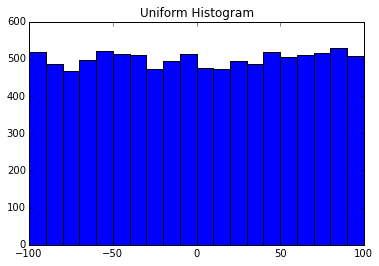

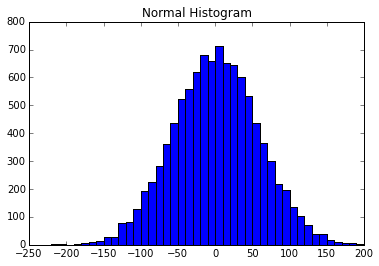

In [6]:
# plot some 1D data
import random

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, stddev 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

# plot
plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

In [7]:
# Now let's look at some 2D data

def random_normal():
    """Returns a random draw from a standard normal
    distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2.0 for x in xs]
ys2 = [-x + random_normal() / 2.0 for x in xs]

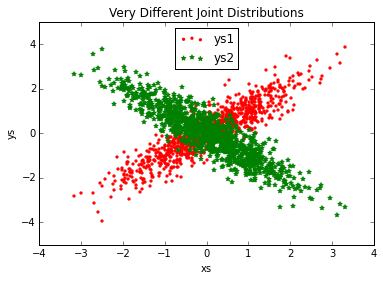

In [8]:
# ys1 and ys2 look very similar, but they correlate with xs very differently
plt.scatter(xs, ys1, marker=".", color='red', label='ys1')
plt.scatter(xs, ys2, marker="*", color='green', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [11]:
from numpy.random import poisson


def mean(x):
    '''geometric average'''
    return sum(x) / len(x)


def de_mean(x):
    '''translate x by subtracting its mean (so the result has mean 0)'''
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


def sum_of_squares(x):
    return sum([f * f for f in x])


def variance(x):
    '''assumes x has at least two elements'''
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)


def standard_deviation(x):
    return sqrt(variance(x))


# From chapter 4: vectors
def dot(v, w):
    '''the sum of the product of the matching elements
    of the input vectors'''
    return sum(v_i * w_i for v_i,w_i in zip(v, w))


# a large covariance means that x tends to be large when y is small
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


'''Correlation lies between -1 (perfect anti-correlation) and 1 (perfect correlation)'''
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return  0


In [12]:
print(correlation(xs, ys1))
print(correlation(xs, ys2))

0.8998865575288909
-0.8969795181463878


In [13]:
def correlation_matrix(data):
    """returns a matrix whose i,j entry is the correlation between
    columns i and j of data"""
    _, num_columns = shape(data)
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    return make_matrix(num_columns, num_columns, matrix_entry)


In [20]:
from collections import defaultdict

d1 = defaultdict(list)
d2 = defaultdict(str)
d3 = defaultdict(int)

# but not this
#d4 = defaultdict(defaultdict(list))
d3['what'] += 2
d3['yarp'] += 7
print(d3)
print(d3.get('farout'))

defaultdict(<class 'int'>, {'what': 2, 'yarp': 7})
None
